# Trying Different learn ratios.

In [6]:
import os
os.getcwd()

'C:\\Users\\mohit'

In [7]:
%load_ext autoreload
%autoreload 2
from algo import *
from evaluation import evaluate
from matplotlib import pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%time
import dataset
files = ("D:/ydata-fp-td-clicks-v1_0.20090502","D:/ydata-fp-td-clicks-v1_0.20090503")
dataset.get_events(files)

There are  7646058 with 62 unique articles
CPU times: total: 4min 12s
Wall time: 7min 56s


In [9]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
Egreedy (ε=1)       0.031     0.0301    42.2s


We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
Egreedy (ε=0.1)     0.0389    0.0371    1.3m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
Egreedy (ε=0.1)     0.0417    0.0425    1.3m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
Egreedy (ε=0.1)     0.042     0.041     1.4m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
Egreedy (ε=0.1)     0.0417    0.0435    1.7m


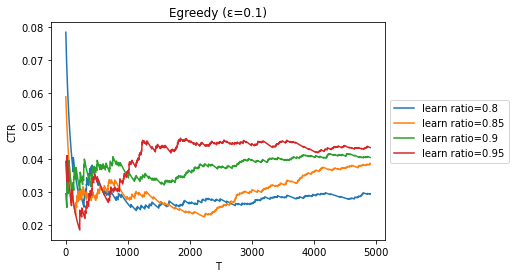

We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
TS                  0.0429    0.0431    6.9m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
TS                  0.0426    0.042     7.1m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
TS                  0.0427    0.041     6.3m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
TS                  0.0431    0.0442    5.5m


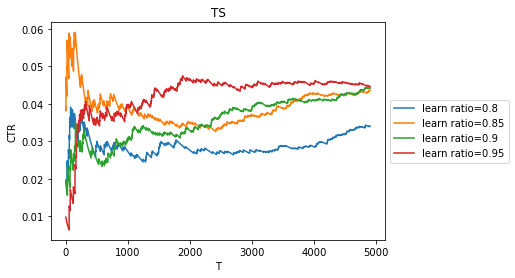

We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
UCB1 (α=0.1)        0.0427    0.0429    3.1m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
UCB1 (α=0.1)        0.0449    0.0457    3.1m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
UCB1 (α=0.1)        0.0444    0.0453    3.2m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
UCB1 (α=0.1)        0.0445    0.0458    3.2m


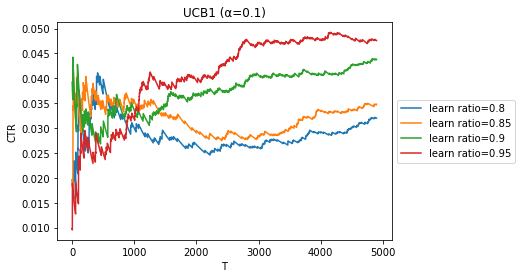

We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:both)0.0506    0.051     13.1m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:both)0.0521    0.0521    13.6m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:both)0.0527    0.0512    13.3m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:both)0.0528    0.0521    15.1m


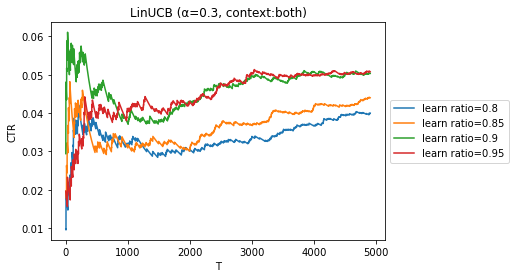

We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:user)0.0492    0.0484    9.6m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:user)0.0511    0.0508    10.7m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:user)0.052     0.052     10.3m
We print Algorith's Name,G_learn/T_learn, G_deploy/T_deploy and execution_time for the algorith
LinUCB (α=0.3, context:user)0.0523    0.0535    10.6m


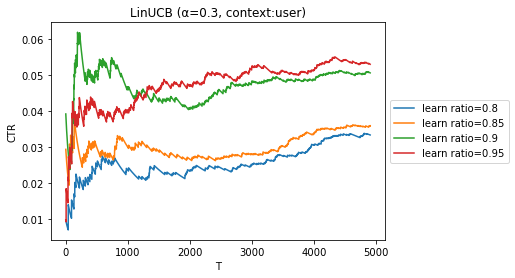

In [10]:
ratio = [0.8,0.85,0.90,0.95]
results = [['Ratio','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),ThompsonSampling(),Ucb1(0.1),LinUCB(0.3,context="both"), LinUCB(0.3,context="user") ]

for alg in algorithms:
    for r in ratio:
        learn ,deploy = evaluate(alg,size=100,learn_ratio=r)
        results.append([r,'learn',alg.algorithm, learn[-1]/rnd_ctr])
        results.append([r,'deploy',alg.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="learn ratio={}".format(r))
        
    plt.title(alg.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()